# Capstone Project 1 - Milestone Report

## Learning Objectives

Write a draft of your Capstone project 1 milestone report with the following included:

1. Define the problem
2. Identify your client
3. Describe your data set, and how you cleaned/wrangled it
4. List other potential data sets you could use
5. Explain your initial findings
6. Share the Capstone Project 1 code and milestone report related to Github repository

Prior Knowledge Recap

You have proposed a project, collected a data set, wrangled and cleaned up the data, and explored it with descriptive + inferential statistics techniques.

## 1.Define the problem


Whether you shop from meticulously planned grocery lists or let whimsy guide your grazing, our unique food rituals define who we are. Instacart, a grocery ordering and delivery app, aims to make it easy to fill your refrigerator and pantry with your personal favorites and staples when you need them. After selecting products through the Instacart app, personal shoppers review your order and do the in-store shopping and delivery for you.

Instacart’s data science team plays a big part in providing this delightful shopping experience. Currently they use transactional data to develop models that predict which products a user will buy again, try for the first time, or add to their cart next during a session. Recently, Instacart open sourced this data - see their blog post on 3 Million Instacart Orders, Open Sourced.

In this competition, Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order. They’re not only looking for the best model, Instacart’s also looking for machine learning engineers to grow their team.

## 2.Identify your client


As it is a past Kaggle competition my clients are Instacart, who is looking to improve their model on predicting which products a user will buy. And I also included my contacts in the food industry, as I'm sharing my findings with them through LinkedIn articles. I believe there is a lot of knowledge that could benefit this community.

## 3.Describe your data set, and how you cleaned/wrangled it


This data is a relational set of files describing customers' orders over time. It's a total of 6 files.
Each entity (customer, product, order, aisle, etc.) has an associated unique id. Most of the files and variable names are self-explanatory.

For the data wrangling I'll use pandas in iPython.

So for every dataset I started by: 
	read the csv file
	check unicode
It all loaded easily as expected

Next for every dataset I ran df.info() so I could find out the types and have an idea of missing values.

Aisles, Departments, Train and Products didn't have any missing value.

I found missing values in the dataset Orders. In the column days_since_prior_order.
Looking closely I've notested that the missing values were related to the first user buy. Since there were no prior days on the first purchase.
The options of filling with values, dropping or interpolate aren't suitable in my opinion. So I decide to leave them for later decision according to the analysis to be performed.

Didn't find outliers in the data.

**Conclusion as this files were provided by Instacart for a kaggle competetion the data is already cleaned and wrangled.**


## 4.List other potential data sets you could use


Data of online food groceries could be of great value for further exploration and insights

## 5.Explain your initial findings

### Feature Engineering

This problem of predicting a buyers purchase involves creating a lot of new features. So in the next cells I´ll demonstrate the logic and how the new features were created for this problem. This is the list of new features created.

1. Driver: First added product to cart that was purchased previously
2. Clusters formed resulting from strong ties between products
3. Days since first order per user (Feature Engineering (Pyspark).ipynb)
4. Frequency of products purchase per user (Feature Engineering (Pyspark).ipynb)

Below are the coding for item 1 and 2, the features corresponding to 3 and 4 were created using pyspark and are demonstrated in Feature Engineering (Pyspark).ipynb in my github

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#aisles = pd.read_csv('Instacart Kaggle/aisles.csv')
#dptmts = pd.read_csv('Instacart Kaggle/departments.csv')
order_pdt_prior = pd.read_csv('Instacart Kaggle/order_products__prior.csv')
all_orders = pd.read_csv('Instacart Kaggle/orders.csv')
#train = pd.read_csv('Instacart Kaggle/order_products__train.csv')
products = pd.read_csv('Instacart Kaggle/products.csv')
#sample_sub = pd.read_csv('Instacart Kaggle/sample_submission.csv')

In [4]:
order_pdt_prior['driver'] = np.where(((order_pdt_prior['add_to_cart_order'] == 1) & (order_pdt_prior['reordered'] == 1)), 1, 0)
order_pdt_prior.head()

,order_id,product_id,add_to_cart_order,reordered,driver
0,2,33120,1,1,1
1,2,28985,2,1,0
2,2,9327,3,0,0
3,2,45918,4,1,0
4,2,30035,5,0,0


In [6]:
# the file was created in gephi using the projected network of user product
# not all products have a register, but the main items purchased are labeled
# for degree its the centrality degree of the product in the projected network
# for modularity class, 0 correspond to products related to social events
# and 1 correspond to products related to personal wellness
clusters = pd.read_csv('Instacart Kaggle/modularity_class_user_product.csv')
clusters = clusters.drop(['Label', 'timeset', 'd0'], axis=1)
clusters = clusters.drop([2394, 2943, 2993], axis = 0)
clusters = clusters.drop([1646, 1719, 2820], axis = 0)
clusters = clusters.rename(columns = {'Id': 'product_id'})
clusters.groupby('modularity_class').count()

,product_id,Degree
modularity_class,,
0,390,390
1,2682,2682


In [16]:
products = products.merge(clusters, on='product_id', how='outer')
products.head()

,product_id,product_name,aisle_id,department_id,Degree,modularity_class
0,1,Chocolate Sandwich Cookies,61,19,6.0,1.0
1,2,All-Seasons Salt,104,13,NaN,NaN
2,3,Robust Golden Unsweetened Oolong Tea,94,7,NaN,NaN
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,NaN,NaN
4,5,Green Chile Anytime Sauce,5,13,NaN,NaN


### Inferential Statistics

Groceries shopping is highly affected by time, so I´ve experiment some hypothesis testing to understand better how is the data affected.

Here are the questions raised:

1. The number of items per order is statistically different across days of the week?
2. The number of items per order is statistically different across hours of the day?
3. Is there a significant difference in proportions of "% social in basket" between weekdays and weekends?

#### Preliminary observations

By taking a look at the variables two stand out for me: order_dow & order_hour_of_day
Lets see some charts on them.

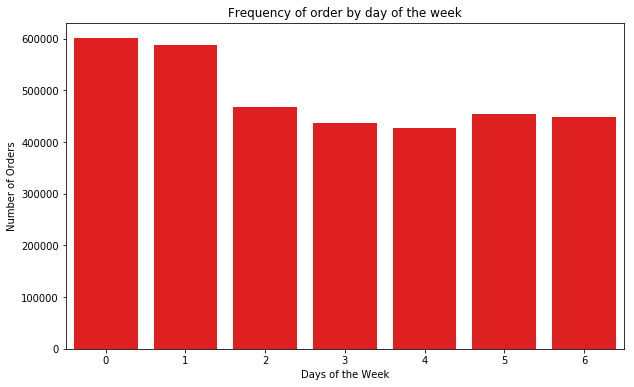

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(x='order_dow', data= all_orders, color='r')
plt.title('Frequency of order by day of the week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')

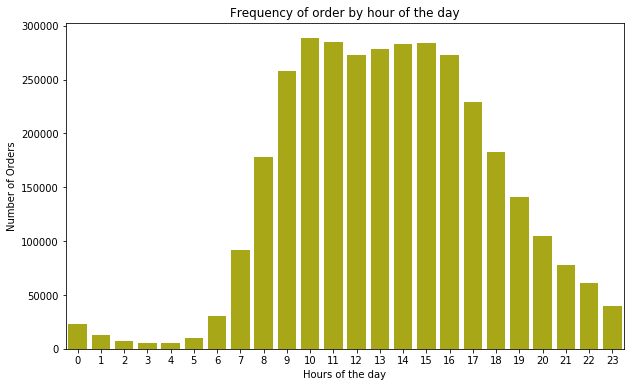

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='order_hour_of_day', data= all_orders, color= 'y')
plt.title('Frequency of order by hour of the day')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Orders')

In [5]:
o = order_pdt_prior
o = o.drop('product_id', axis=1)
o = o.drop('reordered', axis=1)
o = o.groupby('order_id').max()
o = o.rename(columns = {'add_to_cart_order': 'n_items'})
o = o.reset_index()
a = all_orders
a = a.drop(['user_id', 'eval_set', 'order_number'], axis=1)
oa = pd.merge(o , a, on='order_id')

In [6]:
dow_0 = oa[oa.order_dow == 0]
dow_1 = oa[oa.order_dow == 1]
dow_2 = oa[oa.order_dow == 2]
dow_3 = oa[oa.order_dow == 3]
dow_4 = oa[oa.order_dow == 4]
dow_5 = oa[oa.order_dow == 5]
dow_6 = oa[oa.order_dow == 6]

In [7]:
dow_0 = dow_0.n_items
dow_1 = dow_1.n_items
dow_2 = dow_2.n_items
dow_3 = dow_3.n_items
dow_4 = dow_4.n_items
dow_5 = dow_5.n_items
dow_6 = dow_6.n_items

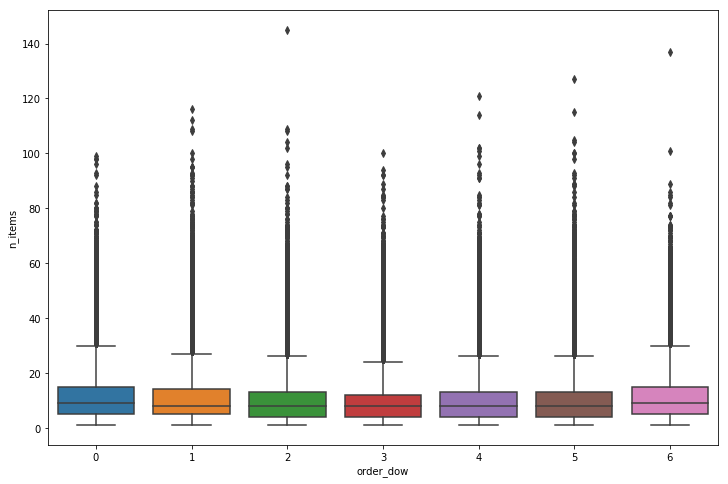

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x='order_dow', y= 'n_items', data=oa)

In [9]:
hod_0 = oa[oa.order_hour_of_day == 0]
hod_1 = oa[oa.order_hour_of_day == 1]
hod_2 = oa[oa.order_hour_of_day == 2]
hod_3 = oa[oa.order_hour_of_day == 3]
hod_4 = oa[oa.order_hour_of_day == 4]
hod_5 = oa[oa.order_hour_of_day == 5]
hod_6 = oa[oa.order_hour_of_day == 6]
hod_7 = oa[oa.order_hour_of_day == 7]
hod_8 = oa[oa.order_hour_of_day == 8]
hod_9 = oa[oa.order_hour_of_day == 9]
hod_10 = oa[oa.order_hour_of_day == 10]
hod_11 = oa[oa.order_hour_of_day == 11]
hod_12 = oa[oa.order_hour_of_day == 12]
hod_13 = oa[oa.order_hour_of_day == 13]
hod_14 = oa[oa.order_hour_of_day == 14]
hod_15 = oa[oa.order_hour_of_day == 15]
hod_16 = oa[oa.order_hour_of_day == 16]
hod_17 = oa[oa.order_hour_of_day == 17]
hod_18 = oa[oa.order_hour_of_day == 18]
hod_19 = oa[oa.order_hour_of_day == 19]
hod_20 = oa[oa.order_hour_of_day == 20]
hod_21 = oa[oa.order_hour_of_day == 21]
hod_22 = oa[oa.order_hour_of_day == 22]
hod_23 = oa[oa.order_hour_of_day == 23]

In [10]:
hod_0 = hod_0.n_items
hod_1 = hod_1.n_items
hod_2 = hod_2.n_items
hod_3 = hod_3.n_items
hod_4 = hod_4.n_items
hod_5 = hod_5.n_items
hod_6 = hod_6.n_items
hod_7 = hod_7.n_items
hod_8 = hod_8.n_items
hod_9 = hod_9.n_items
hod_10 = hod_10.n_items
hod_11 = hod_11.n_items
hod_12 = hod_12.n_items
hod_13 = hod_13.n_items
hod_14 = hod_14.n_items
hod_15 = hod_15.n_items
hod_16 = hod_16.n_items
hod_17 = hod_17.n_items
hod_18 = hod_18.n_items
hod_19 = hod_19.n_items
hod_20 = hod_20.n_items
hod_21 = hod_21.n_items
hod_22 = hod_22.n_items
hod_23 = hod_23.n_items

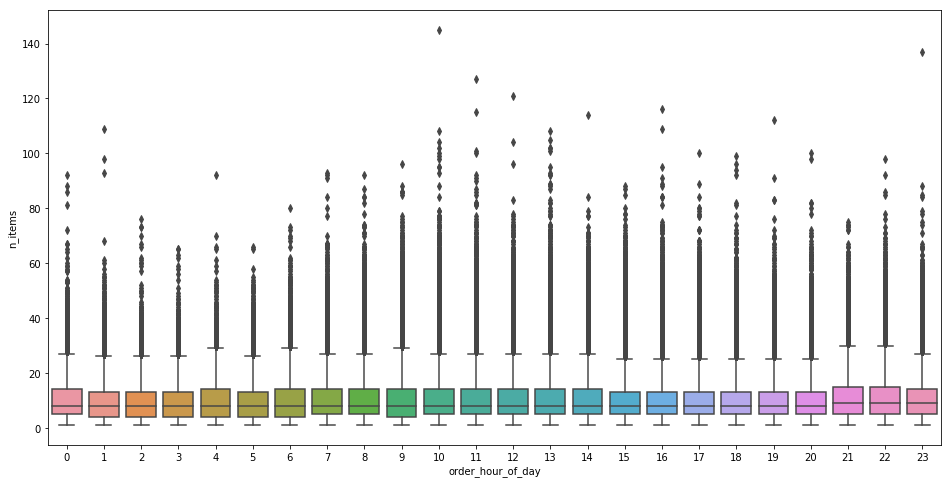

In [11]:
plt.figure(figsize=(16,8))
sns.boxplot(x='order_hour_of_day', y= 'n_items', data=oa)

#### 1. The number of items per order is statistically different across days of the week?

#### 2. The number of items per order is statistically different across hours of the day?

Definition of tests:

Anova

Set up tests:

(1) select n_items_order in every weekday -> run stats.f_oneway -> analyze p-value
(2) select n_items_order in every hour of day -> run stats.f_oneway -> analyze p-value

Null Hypothesis:

(1) Mean dow0 = Mean dow_1 = Mean dow_2 = Mean dow_3 = Mean dow_4 = Mean dow_5 = Mean dow_6

(2) Similar to above, all means are of hour of day (hod) are equal

In [12]:
import scipy.stats as stats
stats.f_oneway(dow_0, dow_1, dow_2, dow_3, dow_4, dow_5, dow_6)

F_onewayResult(statistic=4015.6412134991238, pvalue=0.0)

In [13]:
import scipy.stats as stats
stats.f_oneway(hod_0, hod_1, hod_2, hod_3, hod_4, hod_5, hod_6, hod_7, hod_8, hod_9, hod_10, hod_11, hod_12,\
               hod_13, hod_14, hod_15, hod_16, hod_17, hod_18, hod_19, hod_20, hod_21, hod_22, hod_23)

F_onewayResult(statistic=188.35913046033031, pvalue=0.0)

Explain results:

(1) we reject the null hypothesis where the means of every day of the week was equal in number of items per order, as the P-value is equal to 0. So, every day of the week does not have the same mean of number of items in per order.

(2) we reject the null hypothesis where the means of every hour of the day was equal in number of items per order, as the P-value is equal to 0. So, every hour of the day does not have the same mean of number of items in per order.

#### 3. Is there a significant difference in proportions of "% social in basket" between weekdays and weekends?

During the Exploratory Data Analysis I've found a cluster of products related to Social Events (plates, organic avocado, diet ginger soda, etc), you can see how I got to this finding on my EDA notebook.

So the idea here is to respond this question:

  -Is there a significant difference in proportions of "% social in basket" between weekdays and weekends?

Definition of test:

  -Difference in proportions

Set up tests:

  -de_para product_id e social events -> criar metrica % social in order -> import numpy as np & from statsmodels.stats.proportion import proportions_ztest

In [14]:
social = clusters[clusters.modularity_class == 0]
social = social.product_id
test = order_pdt_prior[order_pdt_prior['product_id'].isin(social)]
test.head()

,order_id,product_id,add_to_cart_order,reordered
7,2,1819,8,1
184,21,33106,2,1
226,25,39046,8,0
231,25,37449,13,0
326,37,33059,2,0


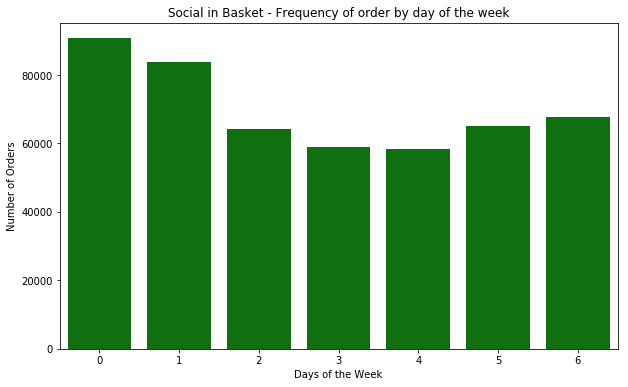

In [15]:
orders_w_social = pd.unique(test.order_id)
orders_w_social_df = all_orders[all_orders['order_id'].isin(orders_w_social)]
plt.figure(figsize=(10,6))
sns.countplot(x='order_dow', data= orders_w_social_df, color='g')
plt.title('Social in Basket - Frequency of order by day of the week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')

##### Hypothesis Test

Null Hypothesis:

P1 : the proportion of orders cointaining social event's products on weekends
P2 : the proportion of orders cointaining social event's products on weekdays

P1 = P2

Alternative Hypothesis:
P1 != P2

For this analysis, the significance level is 0.05. The test method is a two-proportion z-test.

p1: success on weekends
n1: number observations on weekends
p2: success on weekdays
n2: number observations on weekdays

p = (p1 * n1 + p2 * n2) / (n1 + n2)

SE = sqrt{ p * ( 1 - p ) * [ (1/n1) + (1/n2) ] }


In [16]:
#p1: success on weekends
p1 = len(orders_w_social_df.loc[(orders_w_social_df.order_dow == 0) | (orders_w_social_df.order_dow == 1)])
#n1: number observations on weekends
n1 = len(all_orders.loc[(all_orders.order_dow == 0) | (all_orders.order_dow == 1)])
#p2: success on weekdays
p2 = len(orders_w_social_df.loc[(orders_w_social_df.order_dow != 0) & (orders_w_social_df.order_dow != 1)])
#n2: number observations on weekdays
n2 = len(all_orders.loc[(all_orders.order_dow != 0) & (all_orders.order_dow != 1)])
import statsmodels.api as sm
zscore, pvalue = sm.stats.proportions_ztest([p1, p2], [n1, n2])
pvalue

C:\Users\LUCILA\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


6.2131086359043612e-52

In [17]:
from scipy.stats import norm
critical_value = norm.ppf(1-(0.05/2))
zscore < critical_value

False

Conclusion

Since the z-score of 15.16 exceeds the critical value of 1.96, we reject the null hypothesis that the difference between the two proportions is no different from zero. 